# Déployez un modèle dans le cloud


# Sommaire :

**1. Préambule**<br />
&emsp;1.1 Problématique<br />
&emsp;1.2 Objectifs dans ce projet<br />
&emsp;1.3 Déroulement des étapes du projet<br />
**2. Choix techniques généraux retenus**<br />
&emsp;2.1 Calcul distribué<br />
&emsp;2.2 Transfert Learning<br />
**3. Déploiement de la solution en local**<br />
&emsp;3.1 Environnement de travail<br />
&emsp;3.2 Installation de Spark<br />
&emsp;3.3 Installation des packages<br />
&emsp;3.4 Import des librairies<br />
&emsp;3.5 Définition des PATH pour charger les images et enregistrer les résultats<br />
&emsp;3.6 Création de la SparkSession<br />
&emsp;3.7 Traitement des données<br />
&emsp;&emsp;3.7.1 Chargement des données<br />
&emsp;&emsp;3.7.2 Préparation du modèle<br />
&emsp;&emsp;3.7.3 Définition du processus de chargement des images et application <br />
&emsp;&emsp;&emsp;&emsp;&emsp;de leur featurisation à travers l'utilisation de pandas UDF<br />
&emsp;&emsp;3.7.4 Exécution des actions d'extractions de features<br />
&emsp;3.8 Chargement des données enregistrées et validation du résultat<br />
**4. Déploiement de la solution sur le cloud**<br />
&emsp;4.1 Choix du prestataire cloud : AWS<br />
&emsp;4.2 Choix de la solution technique : EMR<br />
&emsp;4.3 Choix de la solution de stockage des données : Amazon S3<br />
&emsp;4.4 Configuration de l'environnement de travail<br />
&emsp;4.5 Upload de nos données sur S3<br />
&emsp;4.6 Configuration du serveur EMR<br />
&emsp;&emsp;4.6.1 Étape 1 : Logiciels et étapes<br />
&emsp;&emsp;&emsp;4.6.1.1 Configuration des logiciels<br />
&emsp;&emsp;&emsp;4.6.1.2 Modifier les paramètres du logiciel<br />
&emsp;&emsp;4.6.2 Étape 2 : Matériel<br />
&emsp;&emsp;4.6.3 Étape 3 : Paramètres de cluster généraux<br />
&emsp;&emsp;&emsp;4.6.3.1 Options générales<br />
&emsp;&emsp;&emsp;4.6.3.2 Actions d'amorçage<br />
&emsp;&emsp;4.6.4 Étape 4 : Sécurité<br />
&emsp;&emsp;&emsp;4.6.4.1 Options de sécurité<br />
&emsp;4.7 Instanciation du serveur<br />
&emsp;4.8 Création du tunnel SSH à l'instance EC2 (Maître)<br />
&emsp;&emsp;4.8.1 Création des autorisations sur les connexions entrantes<br />
&emsp;&emsp;4.8.2 Création du tunnel ssh vers le Driver<br />
&emsp;&emsp;4.8.3 Configuration de FoxyProxy<br />
&emsp;&emsp;4.8.4 Accès aux applications du serveur EMR via le tunnel ssh<br />
&emsp;4.9 Connexion au notebook JupyterHub<br />
&emsp;4.10 Exécution du code<br />
&emsp;&emsp;4.10.1 Démarrage de la session Spark<br />
&emsp;&emsp;4.10.2 Installation des packages<br />
&emsp;&emsp;4.10.3 Import des librairies<br />
&emsp;&emsp;4.10.4 Définition des PATH pour charger les images et enregistrer les résultats<br />
&emsp;&emsp;4.10.5 Traitement des données<br />
&emsp;&emsp;&emsp;4.10.5.1 Chargement des données<br />
&emsp;&emsp;&emsp;4.10.5.2 Préparation du modèle<br />
&emsp;&emsp;&emsp;4.10.5.3 Définition du processus de chargement des images<br />
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;et application de leur featurisation à travers l'utilisation de pandas UDF<br />
&emsp;&emsp;&emsp;4.10.5.4 Exécutions des actions d'extractions de features<br />
&emsp;&emsp;4.10.6 Chargement des données enregistrées et validation du résultat<br />
&emsp;4.11 Suivi de l'avancement des tâches avec le Serveur d'Historique Spark<br />
&emsp;4.12 Résiliation de l'instance EMR<br />
&emsp;4.13 Cloner le serveur EMR (si besoin)<br />
&emsp;4.14 Arborescence du serveur S3 à la fin du projet<br />
**5. Conclusion**

# 1. Préambule

## 1.1 Problématique

La très jeune start-up de l'AgriTech, nommée "**Fruits**!", <br />
cherche à proposer des solutions innovantes pour la récolte des fruits.

La volonté de l’entreprise est de préserver la biodiversité des fruits <br />
en permettant des traitements spécifiques pour chaque espèce de fruits <br />
en développant des robots cueilleurs intelligents.

La start-up souhaite dans un premier temps se faire connaître en mettant <br />
à disposition du grand public une application mobile qui permettrait aux <br />
utilisateurs de prendre en photo un fruit et d'obtenir des informations sur ce fruit.

Pour la start-up, cette application permettrait de sensibiliser le grand public <br /> 
à la biodiversité des fruits et de mettre en place une première version du moteur <br />
de classification des images de fruits.

De plus, le développement de l’application mobile permettra de construire <br />
une première version de l'architecture **Big Data** nécessaire.

## 1.2 Objectifs dans ce projet

1. Développer une première chaîne de traitement des données qui <br />
   comprendra le **preprocessing** et une étape de **réduction de dimension**.
2. Tenir compte du fait que <u>le volume de données va augmenter <br />
   très rapidement</u> après la livraison de ce projet, ce qui implique de:
 - Déployer le traitement des données dans un environnement **Big Data**
 - Développer les scripts en **pyspark** pour effectuer du **calcul distribué**

## 1.3 Déroulement des étapes du projet

Le projet va être réalisé en 2 temps, dans deux environnements différents. <br />
Nous allons dans un premier temps développer et exécuter notre code en local, <br />
en travaillant sur un nombre limité d'images à traiter.

Une fois les choix techniques validés, nous déploierons notre solution <br />
dans un environnement Big Data en mode distribué.

<u>Pour cette raison, ce projet sera divisé en 3 parties</u>:
1. Liste des choix techniques généraux retenus
2. Déploiement de la solution en local
3. Déploiement de la solution dans le cloud

# 2. Choix techniques généraux retenus

## 2.1 Calcul distribué

L’énoncé du projet nous impose de développer des scripts en **pyspark** <br />
afin de <u>prendre en compte l’augmentation très rapide du volume <br />
de donné après la livraison du projet</u>.

Pour comprendre rapidement et simplement ce qu’est **pyspark** <br />
et son principe de fonctionnement, nous vous conseillons de lire <br />
cet article : [PySpark : Tout savoir sur la librairie Python](https://datascientest.com/pyspark)

<u>Le début de l’article nous dit ceci </u>:<br />
« *Lorsque l’on parle de traitement de bases de données sur python, <br />
on pense immédiatement à la librairie pandas. Cependant, lorsqu’on a <br />
affaire à des bases de données trop massives, les calculs deviennent trop lents.<br />
Heureusement, il existe une autre librairie python, assez proche <br />
de pandas, qui permet de traiter des très grandes quantités de données : PySpark.<br />
Apache Spark est un framework open-source développé par l’AMPLab <br />
de UC Berkeley permettant de traiter des bases de données massives <br />
en utilisant le calcul distribué, technique qui consiste à exploiter <br />
plusieurs unités de calcul réparties en clusters au profit d’un seul <br />
projet afin de diviser le temps d’exécution d’une requête.<br />
Spark a été développé en Scala et est au meilleur de ses capacités <br />
dans son langage natif. Cependant, la librairie PySpark propose de <br />
l’utiliser avec le langage Python, en gardant des performances <br />
similaires à des implémentations en Scala.<br />
Pyspark est donc une bonne alternative à la librairie pandas lorsqu’on <br />
cherche à traiter des jeux de données trop volumineux qui entraînent <br />
des calculs trop chronophages.* »

Comme nous le constatons, **pySpark** est un moyen de communiquer <br />
avec **Spark** via le langage **Python**.<br />
**Spark**, quant à lui, est un outil qui permet de gérer et de coordonner <br />
l'exécution de tâches sur des données à travers un groupe d'ordinateurs. <br />
<u>Spark (ou Apache Spark) est un framework open source de calcul distribué <br />
in-memory pour le traitement et l'analyse de données massives</u>.

Un autre [article très intéressant et beaucoup plus complet pour <br />
comprendre le **fonctionnement de Spark**](https://www.veonum.com/apache-spark-pour-les-nuls/), ainsi que le rôle <br />
des **Spark Session** que nous utiliserons dans ce projet.

<u>Voici également un extrait</u>:

*Les applications Spark se composent d’un pilote (« driver process ») <br />
et de plusieurs exécuteurs (« executor processes »). Il peut être configuré <br />
pour être lui-même l’exécuteur (local mode) ou en utiliser autant que <br />
nécessaire pour traiter l’application, Spark prenant en charge la mise <br />
à l’échelle automatique par une configuration d’un nombre minimum <br />
et maximum d’exécuteurs.*

![Schéma de Spark](img/spark-schema.png)

*Le driver (parfois appelé « Spark Session ») distribue et planifie <br />
les tâches entre les différents exécuteurs qui les exécutent et permettent <br />
un traitement réparti. Il est le responsable de l’exécution du code <br />
sur les différentes machines.

Chaque exécuteur est un processus Java Virtual Machine (JVM) distinct <br />
dont il est possible de configurer le nombre de CPU et la quantité de <br />
mémoire qui lui est alloué. <br />
Une seule tâche peut traiter un fractionnement de données à la fois.*

Dans les deux environnements (Local et Cloud) nous utiliserons donc **Spark** <br />
et nous l’exploiterons à travers des scripts python grâce à **PySpark**.

Dans la <u>version locale</u> de notre script nous **simulerons <br />
le calcul distribué** afin de valider que notre solution fonctionne.<br />
Dans la <u>version cloud</u> nous **réaliserons les opérations sur un cluster de machine**.

## 2.2 Transfert Learning

L'énoncé du projet nous demande également de <br />
réaliser une première chaîne de traitement <br />
des données qui comprendra le preprocessing et <br />
une étape de réduction de dimension.

Il est également précisé qu'il n'est pas nécessaire <br />
d'entraîner un modèle pour le moment.

Nous décidons de partir sur une solution de **transfert learning**.

Simplement, le **transfert learning** consiste <br />
à utiliser la connaissance déjà acquise <br />
par un modèle entraîné (ici **MobileNetV2**) pour <br />
l'adapter à notre problématique.

Nous allons fournir au modèle nos images, et nous allons <br />
<u>récupérer l'avant dernière couche</u> du modèle.<br />
En effet la dernière couche de modèle est une couche softmax <br />
qui permet la classification des images ce que nous ne <br />
souhaitons pas dans ce projet.

L'avant dernière couche correspond à un **vecteur <br />
réduit** de dimension (1,1,1280).

Cela permettra de réaliser une première version du moteur <br />
pour la classification des images des fruits.

**MobileNetV2** a été retenu pour sa <u>rapidité d'exécution</u>, <br />
particulièrement adaptée pour le traitement d'un gros volume <br />
de données ainsi que la <u>faible dimensionnalité du vecteur <br />
de caractéristique en sortie</u> (1,1,1280)

### 4.10.1 Démarrage de la session Spark

In [1]:
# L'exécution de cette cellule démarre l'application Spark

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1697887572418_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<u>Affichage des informations sur la session en cours et liens vers Spark UI</u> :

In [2]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1697887572418_0001,pyspark,idle,Link,Link,None,
1,application_1697887572418_0002,pyspark,idle,Link,Link,None,✔


### 4.10.2 Installation des packages

Les packages nécessaires ont été installé via l'étape de **bootstrap** à l'instanciation du serveur.

### 4.10.3 Import des librairies

In [39]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import Model
from pyspark.sql.functions import col, pandas_udf, PandasUDFType, element_at, split, udf

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
import pkg_resources

# Liste des packages installés
installed_packages = pkg_resources.working_set

# Affichez le nom de chaque package
for package in installed_packages:
    print(package)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

zipp 3.4.0
wrapt 1.15.0
wheel 0.35.1
urllib3 1.26.15
typing-extensions 4.7.1
tqdm 4.66.1
tensorflow 2.11.0
tensorflow-io-gcs-filesystem 0.34.0
tensorflow-estimator 2.11.0
tensorboard 2.11.0
tensorboard-plugin-wit 1.8.0
rsa 4.6
requests 2.31.0
requests-oauthlib 1.3.0
regex 2021.11.10
PyYAML 5.4.1
pyasn1 0.4.8
pyasn1-modules 0.2.8
pyarrow 12.0.0
protobuf 3.20.1
Pillow 9.5.0
pandas 1.3.5
packaging 23.1
oauthlib 3.1.0
numpy 1.20.0
mysqlclient 1.4.2
matplotlib 3.5.3
MarkupSafe 2.1.3
lxml 4.9.3
kiwisolver 1.4.5
Keras-Preprocessing 1.1.2
joblib 1.3.2
importlib-metadata 2.0.0
idna 2.10
h5py 3.8.0
grpcio 1.59.0
google-pasta 0.2.0
google-auth 1.23.0
google-auth-oauthlib 0.4.2
flatbuffers 23.5.26
cryptography 3.2.1
click 8.1.7
charset-normalizer 3.3.0
chardet 5.2.0
certifi 2023.7.22
cachetools 4.1.1
astunparse 1.6.3
windmill 1.6
Werkzeug 2.2.3
webencodings 0.5.1
termcolor 2.3.0
tensorboard-data-server 0.6.1
six 1.13.0
setuptools 68.0.0
s3transfer 0.7.0
s3fs 0.4.2
pytz 2023.3.post1
python-dateutil

### 4.10.4 Définition des PATH pour charger les images et enregistrer les résultats

Nous accédons directement à nos **données sur S3** comme si elles étaient **stockées localement**.

In [5]:
PATH = 's3://kevinel-bucketaws-ocds-p8'
PATH_Data = PATH+'/Test'
PATH_Result = PATH+'/Results'
print('PATH:        '+\
      PATH+'\nPATH_Data:   '+\
      PATH_Data+'\nPATH_Result: '+PATH_Result)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

PATH:        s3://kevinel-bucketaws-ocds-p8
PATH_Data:   s3://kevinel-bucketaws-ocds-p8/Test
PATH_Result: s3://kevinel-bucketaws-ocds-p8/Results

### 4.10.5 Traitement des données

#### 4.10.5.1 Chargement des données

In [6]:
images = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load(PATH_Data)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
images.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+------+--------------------+
|                path|   modificationTime|length|             content|
+--------------------+-------------------+------+--------------------+
|s3://kevinel-buck...|2023-10-12 12:10:34|  7353|[FF D8 FF E0 00 1...|
|s3://kevinel-buck...|2023-10-12 12:10:34|  7350|[FF D8 FF E0 00 1...|
|s3://kevinel-buck...|2023-10-12 12:10:34|  7349|[FF D8 FF E0 00 1...|
|s3://kevinel-buck...|2023-10-12 12:10:34|  7348|[FF D8 FF E0 00 1...|
|s3://kevinel-buck...|2023-10-12 12:10:34|  7328|[FF D8 FF E0 00 1...|
+--------------------+-------------------+------+--------------------+
only showing top 5 rows

In [10]:
print("Le nombre d'image dans notre dataset est {}".format(images.count()))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Le nombre d'image dans notre dataset 22688

<u>Je ne conserve que le **path** de l'image et j'ajoute <br />
    une colonne contenant les **labels** de chaque image</u> :

In [11]:
images = images.withColumn('label', element_at(split(images['path'], '/'),-2))
print(images.printSchema())
print(images.select('path','label').show(5,False))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)
 |-- label: string (nullable = true)

None
+------------------------------------------------------------+----------+
|path                                                        |label     |
+------------------------------------------------------------+----------+
|s3://kevinel-bucketaws-ocds-p8/Test/Watermelon/r_106_100.jpg|Watermelon|
|s3://kevinel-bucketaws-ocds-p8/Test/Watermelon/r_109_100.jpg|Watermelon|
|s3://kevinel-bucketaws-ocds-p8/Test/Watermelon/r_108_100.jpg|Watermelon|
|s3://kevinel-bucketaws-ocds-p8/Test/Watermelon/r_107_100.jpg|Watermelon|
|s3://kevinel-bucketaws-ocds-p8/Test/Watermelon/r_95_100.jpg |Watermelon|
+------------------------------------------------------------+----------+
only showing top 5 rows

None

#### 4.10.5.2 Préparation du modèle

In [12]:
model = MobileNetV2(weights='imagenet',
                    include_top=True,
                    input_shape=(224, 224, 3))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

14536120/14536120 [==============================] - 1s 0us/step

In [13]:
new_model = Model(inputs=model.input,
                  outputs=model.layers[-2].output)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Tous les workeurs doivent pouvoir accéder au modèle ainsi qu'à ses poids. <br />
Une bonne pratique consiste à charger le modèle sur le driver puis à diffuser <br />
ensuite les poids aux différents workeurs.

In [14]:
brodcast_weights = sc.broadcast(new_model.get_weights())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
new_model.summary()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [16]:
def model_fn():
    """
    Returns a MobileNetV2 model with top layer removed 
    and broadcasted pretrained weights.
    """
    model = MobileNetV2(weights='imagenet',
                        include_top=True,
                        input_shape=(224, 224, 3))
    for layer in model.layers:
        layer.trainable = False
    new_model = Model(inputs=model.input,
                  outputs=model.layers[-2].output)
    new_model.set_weights(brodcast_weights.value)
    return new_model

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### 4.10.5.3 Définition du processus de chargement des images <br/> et application de leur featurisation à travers l'utilisation de pandas UDF

Ce notebook définit la logique par étapes, jusqu'à Pandas UDF.

<u>L'empilement des appels est la suivante</u> :

- Pandas UDF
  - featuriser une série d'images pd.Series
   - prétraiter une image

In [17]:
def preprocess(content):
    """
    Preprocesses raw image bytes for prediction.
    """
    img = Image.open(io.BytesIO(content)).resize([224, 224])
    arr = img_to_array(img)
    return preprocess_input(arr)

def featurize_series(model, content_series):
    """
    Featurize a pd.Series of raw images using the input model.
    :return: a pd.Series of image features
    """
    input = np.stack(content_series.map(preprocess))
    preds = model.predict(input)
    # For some layers, output features will be multi-dimensional tensors.
    # We flatten the feature tensors to vectors for easier storage in Spark DataFrames.
    output = [p.flatten() for p in preds]
    return pd.Series(output)

@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
    '''
    This method is a Scalar Iterator pandas UDF wrapping our featurization function.
    The decorator specifies that this returns a Spark DataFrame column of type ArrayType(FloatType).

    :param content_series_iter: This argument is an iterator over batches of data, where each batch
                              is a pandas Series of image data.
    '''
    # With Scalar Iterator pandas UDFs, we can load the model once and then re-use it
    # for multiple data batches.  This amortizes the overhead of loading big models.
    model = model_fn()
    for content_series in content_series_iter:
        yield featurize_series(model, content_series)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1697887572418_0002/container_1697887572418_0002_01_000002/pyspark.zip/pyspark/sql/pandas/functions.py:403: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.

#### 4.10.5.4 Exécutions des actions d'extractions de features

Les Pandas UDF, sur de grands enregistrements (par exemple, de très grandes images), <br />
peuvent rencontrer des erreurs de type Out Of Memory (OOM).<br />
Si vous rencontrez de telles erreurs dans la cellule ci-dessous, <br />
essayez de réduire la taille du lot Arrow via 'maxRecordsPerBatch'

Je n'utiliserai pas cette commande dans ce projet <br />
et je laisse donc la commande en commentaire.

In [18]:
# spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "1024")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
features_df = images.repartition(24).select(col("path"),
                                            col("label"),
                                            featurize_udf("content").alias("features")
                                           )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
features_df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

22688

In [19]:
features_df.write.mode("overwrite").parquet(PATH_Result)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### 4.10.5.5 Reduction de dimension des features en appliquant une ACP

In [21]:
features_df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- path: string (nullable = true)
 |-- label: string (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: float (containsNull = true)

In [22]:
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import udf
from pyspark.ml.feature import PCA
from pyspark.ml.feature import StandardScaler

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
# Définir une fonction UDF pour convertir un tableau en un vecteur dense
def array_to_dense_vector(arr):
    return Vectors.dense(arr)

# Enregistrez la fonction UDF
array_to_dense_vector_udf = udf(array_to_dense_vector, VectorUDT())

# Appliquer la fonction UDF pour convertir la colonne features en un vecteur dense
features_dff = features_df.withColumn("features", array_to_dense_vector_udf(features_df.features))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
# Perform PCA
pca = PCA(k=640, inputCol='features', outputCol='pca_features')
pca_model = pca.fit(features_dff)

# Transform the data
pca_features_df = pca_model.transform(features_dff)

# Obtenir les ébolies des valeurs propres
explainedVariance = pca_model.explainedVariance

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Selection du nombre d'axe à conserver

- ébouli des valeurs propes

In [25]:
import matplotlib.pyplot as plt
import matplotlib
scree_cumsum_df = np.cumsum(explainedVariance)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
plt.figure(figsize=(12,8))
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.title("Scree plot")

plt.plot(range(len(scree_cumsum_df)), scree_cumsum_df)
plt.axhline(y=0.99, color='r', linestyle='--')
plt.axhline(y=0.9, color='g', linestyle='--')
plt.axhline(y=0.8, color='g', linestyle='--')

plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
idx = [x+1 for x in range(len(scree_cumsum_df))]
print("Le seuil de 50% de variance expliqué est atteint avec {} composantes principales".format(np.max(np.array(idx)[scree_cumsum_df<=0.5])))
print("Le seuil de 60% de variance expliqué est atteint avec {} composantes principales".format(np.max(np.array(idx)[scree_cumsum_df<=0.6]) ))
print("Le seuil de 70% de variance expliqué est atteint avec {} composantes principales".format(np.max(np.array(idx)[scree_cumsum_df<=0.7]) ))
print("Le seuil de 80% de variance expliqué est atteint avec {} composantes principales".format(np.max(np.array(idx)[scree_cumsum_df<=0.8])))
print("Le seuil de 90% de variance expliqué est atteint avec {} composantes principales".format(np.max(np.array(idx)[scree_cumsum_df<=0.9]) ))
print("Le seuil de 99% de variance expliqué est atteint avec {} composantes principales".format(np.max(np.array(idx)[scree_cumsum_df<=0.99]) ))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Le seuil de 50% de variance expliqu? est atteint avec 13 composantes principales
Le seuil de 60% de variance expliqu? est atteint avec 22 composantes principales
Le seuil de 70% de variance expliqu? est atteint avec 40 composantes principales
Le seuil de 80% de variance expliqu? est atteint avec 79 composantes principales
Le seuil de 90% de variance expliqu? est atteint avec 184 composantes principales
Le seuil de 99% de variance expliqu? est atteint avec 640 composantes principales

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

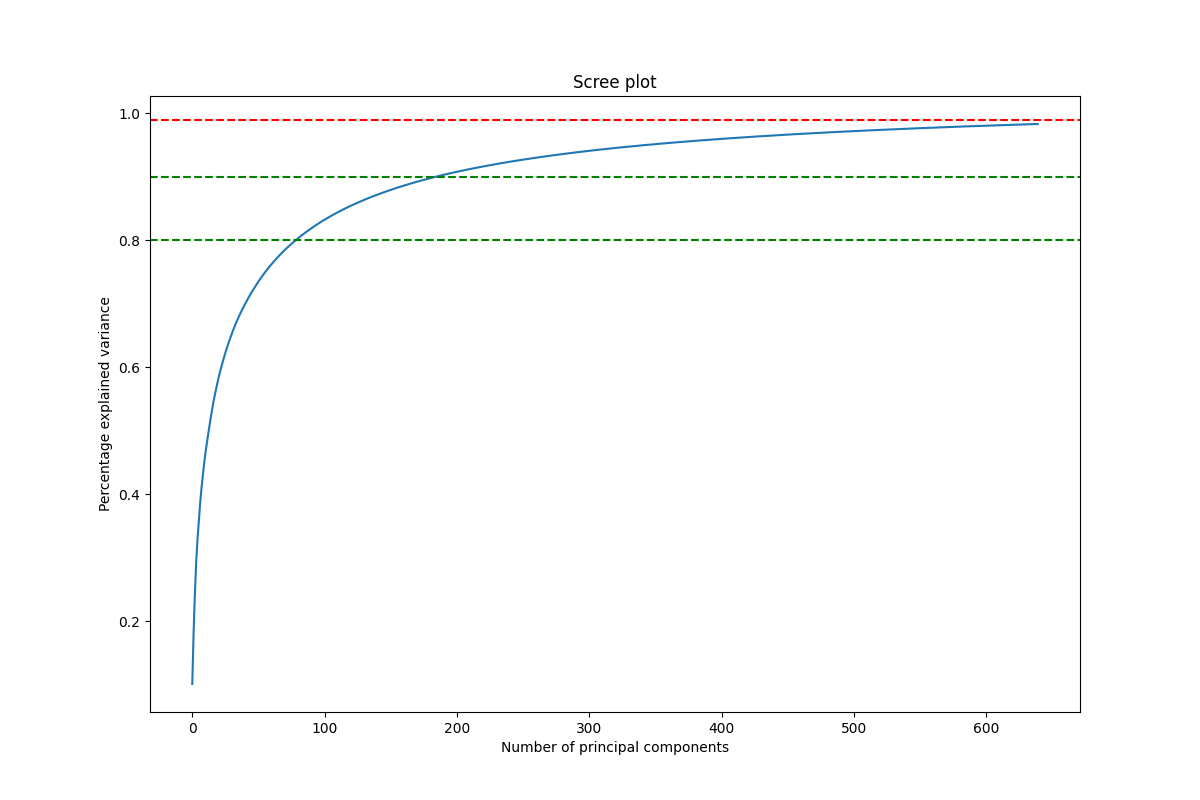

In [27]:
%matplot plt

In [40]:
# Perform PCA
pca_best = PCA(k=184, inputCol='features', outputCol='pca_features')
pca_best_model = pca_best.fit(features_dff)

# Transform the data
pca_best_features_df = pca_best_model.transform(features_dff)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
pca_best_features_df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+--------------------+--------------------+
|                path|         label|            features|        pca_features|
+--------------------+--------------+--------------------+--------------------+
|s3://kevinel-buck...|Pineapple Mini|[0.01539323758333...|[-5.4542178277729...|
|s3://kevinel-buck...|    Watermelon|[0.0,0.9113100171...|[-2.5051596456404...|
|s3://kevinel-buck...|Pineapple Mini|[0.0,4.5198941230...|[-6.4304588497723...|
|s3://kevinel-buck...|   Cauliflower|[0.0,0.4295242130...|[-4.5937887207996...|
|s3://kevinel-buck...|   Cauliflower|[0.0,0.0903867110...|[-5.1800649681473...|
+--------------------+--------------+--------------------+--------------------+
only showing top 5 rows

In [42]:
# save to csv
from pyspark.sql.types import StringType
format_udf = udf(lambda x: str(x), StringType()) 

df_csv = pca_best_features_df.select("path","label","pca_features").withColumn('pca_features', format_udf(col('pca_features')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
df_csv.show(2)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+--------------------+
|                path|     label|        pca_features|
+--------------------+----------+--------------------+
|s3://kevinel-buck...|Watermelon|[-3.6636958702155...|
|s3://kevinel-buck...|Watermelon|[-1.8046526522991...|
+--------------------+----------+--------------------+
only showing top 2 rows

In [ ]:
df_csv = pca_best_features_df.select("path","label","pca_features").withColumn('pca_features', format_udf(col('pca_features')))

In [47]:
# one way
df_csv.repartition(1).write.csv(PATH+"/featuresImagReducted.csv", sep='\t')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
# an other way
df_csv.write.mode("overwrite").option("delimiter", "\t").option("header","true").csv(PATH_Result + "_acp.csv")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
df_csv.write.mode("overwrite").option("delimiter", "\t").option("header","true").csv(PATH_Result + "_acp.csv")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

</br>

</br>

In [56]:
pca_best_features_df.persist()
pca_best_features_df.show(1)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+--------------------+--------------------+
|                path|     label|            features|        pca_features|
+--------------------+----------+--------------------+--------------------+
|s3://kevinel-buck...|Watermelon|[0.24856485426425...|[-3.6636958702155...|
+--------------------+----------+--------------------+--------------------+
only showing top 1 row

In [74]:
from pyspark.ml.functions import vector_to_array

df_matrix_pca = pca_best_features_df.withColumn("pca_features_tmp",vector_to_array("pca_features"))

num_columns = 184
columns = [f"col{i + 1}" for i in range(num_columns)]


# Sélectionnez les éléments du tableau en tant que colonnes dans le DataFrame
for i in range(num_columns):
    df_matrix_pca = df_matrix_pca.withColumn(columns[i], df_matrix_pca.pca_features_tmp[i])
    
df_matrix_pca = df_matrix_pca.drop('pca_features_tmp')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+--------------------+--------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+--------------------+------------------+-------------------+-------------------+-------------------+--------------------+------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+-------------------+---

In [76]:
df_matrix_pca.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- path: string (nullable = true)
 |-- label: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- pca_features: vector (nullable = true)
 |-- col1: double (nullable = true)
 |-- col2: double (nullable = true)
 |-- col3: double (nullable = true)
 |-- col4: double (nullable = true)
 |-- col5: double (nullable = true)
 |-- col6: double (nullable = true)
 |-- col7: double (nullable = true)
 |-- col8: double (nullable = true)
 |-- col9: double (nullable = true)
 |-- col10: double (nullable = true)
 |-- col11: double (nullable = true)
 |-- col12: double (nullable = true)
 |-- col13: double (nullable = true)
 |-- col14: double (nullable = true)
 |-- col15: double (nullable = true)
 |-- col16: double (nullable = true)
 |-- col17: double (nullable = true)
 |-- col18: double (nullable = true)
 |-- col19: double (nullable = true)
 |-- col20: double (nullable = true)
 |-- col21: double (nullable = true)
 |-- col22: double (nullable = true)
 |-- col23: double (nullable = tr

In [80]:
# one way
df_matrix_pca.withColumn("pca_features", df_matrix_pca.pca_features.cast("string"))\
.withColumn("features", df_matrix_pca.features.cast("string"))\
.repartition(1)\
.write.mode("overwrite").option("header","true").csv(PATH+"/featuresImagReductedmatrix.csv", sep='\t')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

</br>

</br>

</br>

### 4.10.6 Chargement des données enregistrées et validation du résultat

In [7]:
df = pd.read_parquet(PATH_Result, engine='pyarrow')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
df.head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                                path  ...                                           features
0  s3://kevinel-bucketaws-ocds-p8/Test/Watermelon...  ...  [0.24856485, 0.37696606, 0.0, 0.04572805, 0.29...
1  s3://kevinel-bucketaws-ocds-p8/Test/Watermelon...  ...  [0.0033762308, 0.64489573, 0.014761691, 0.0, 1...
2  s3://kevinel-bucketaws-ocds-p8/Test/Watermelon...  ...  [0.0, 0.91131, 0.0, 0.0068203965, 1.9110236, 0...
3  s3://kevinel-bucketaws-ocds-p8/Test/Pineapple ...  ...  [0.0, 4.519894, 0.0, 0.0, 0.0, 0.0, 0.3275102,...
4  s3://kevinel-bucketaws-ocds-p8/Test/Cauliflowe...  ...  [0.0, 0.09038671, 1.9601653, 0.0, 0.02784841, ...

[5 rows x 3 columns]

In [9]:
df.loc[0,'features'].shape

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(1280,)

In [10]:
df.shape

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(22688, 3)

In [14]:
df.to_csv("s3://kevinel-bucketaws-ocds-p8/export_features_img.csv")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
%%local
import os
os.listdir()

['jupyterhub_cookie_secret',
 'jupyterhub.sqlite',
 'jupyterhub-proxy.pid',
 '.cache',
 '.local',
 '.ipynb_checkpoints',
 '.ipython',
 '.sparkmagic',
 '.autovizwidget',
 '.config']

<u>On peut également constater la présence des fichiers <br />
    au format "**parquet**" sur le **serveur S3**</u> :

![Affichage des résultats sur S3](img/S3_Results.png)

## 4.11 Suivi de l'avancement des tâches avec le Serveur d'Historique Spark

Il est possible de voir l'avancement des tâches en cours <br />
avec le **serveur d'historique Spark**.

![Accès au serveur d'historique spark](img/EMR_serveur_historique_spark_acces.png)

**Il est également possible de revenir et d'étudier les tâches <br />
qui ont été réalisé, afin de debugger, optimiser les futurs <br />
tâches à réaliser.**

<u>Lorsque la commande "**features_df.write.mode("overwrite").parquet(PATH_Result)**" <br />
était en cours, nous pouvions observer son état d'avancement</u> :

![Progression execution script](img/EMR_jupyterhub_avancement.png)

<u>Le **serveur d'historique Spark** nous permet une vision beaucoup plus précise <br />
de l'exécution des différentes tâche sur les différentes machines du cluster</u> :

![Suivi des tâches spark](img/EMR_SHSpark_01.png)

On peut également constater que notre cluster de calcul a mis <br />
un tout petit peu **moins de 8 minutes** pour traiter les **22 688 images**.

![Temps de traitement](img/EMR_SHSpark_02.png)


## 4.12 Résiliation de l'instance EMR

Notre travail est maintenant terminé. <br />
Le cluster de machines EMR est **facturé à la demande**, <br />
et nous continuons d'être facturé même lorsque <br />
les machines sont au repos.<br />
Pour **optimiser la facturation**, il nous faut <br />
maintenant **résilier le cluster**.

<u>Je réalise cette commande depuis l'interface AWS</u> :

1. Commencez par **désactiver le tunnel ssh dans FoxyProxy** pour éviter des problèmes de **timeout**.
![Désactivation de FoxyProxy](img/EMR_foxyproxy_desactivation.png)
2. Cliquez sur "**Résilier**"
![Cliquez sur Résilier](img/EMR_resiliation_01.png)
3. Confirmez la résiliation
![Confirmez la résiliation](img/EMR_resiliation_02.png)
4. La résiliation prend environ **1 minute**
![Résiliation en cours](img/EMR_resiliation_03.png)
5. La résiliation est effectuée
![Résiliation terminée](img/EMR_resiliation_04.png)

## 4.13 Cloner le serveur EMR (si besoin)

Si nous devons de nouveau exécuter notre notebook dans les mêmes conditions, <br />
il nous suffit de **cloner notre cluster** et ainsi en obtenir une copie fonctionnelle <br />
sous 15/20 minutes, le temps de son instanciation.

<u>Pour cela deux solutions</u> :
1. <u>Depuis l'interface AWS</u> :
 1. Cliquez sur "**Cloner**"
   ![Cloner un cluster](img/EMR_cloner_01.png)
 2. Dans notre cas nous ne souhaitons pas inclure d'étapes
   ![Ne pas inclure d'étapes](img/EMR_cloner_02.png)
 3. La configuration du cluster est recréée à l’identique. <br />
    On peut revenir sur les différentes étapes si on souhaite apporter des modifications<br />
    Quand tout est prêt, cliquez sur "**Créer un cluster**"
  ![Vérification/Modification/Créer un cluster](img/EMR_cloner_03.png)
2. <u>En ligne de commande</u> (avec AWS CLI d'installé et de configuré et en s'assurant <br />
   de s'attribuer les droits nécessaires sur le compte AMI utilisé)
 1. Cliquez sur "**Exporter AWS CLI**"
 ![Exporter AWS CLI](img/EMR_cloner_cli_01.png)
 2. Copier/Coller la commande **depuis un terminal**
 ![Copier Coller Commande](img/EMR_cloner_cli_02.png)

## 4.14 Arborescence du serveur S3 à la fin du projet

<u>Pour information, voici **l'arborescence complète de mon bucket S3 p8-data** à la fin du projet</u> : <br />
*Par soucis de lisibilité, je ne liste pas les 131 sous dossiers du répertoire "Test"*

1. Results/_SUCCESS
1. Results/part-00000-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00001-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00002-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00003-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00004-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00005-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00006-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00007-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00008-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00009-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00010-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00011-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00012-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00013-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00014-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00015-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00016-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00017-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00018-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00019-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00020-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00021-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00022-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Results/part-00023-2cc36f38-19ef-4d8a-a0d1-5ddb309b3894-c000.snappy.parquet
1. Test/
1. bootstrap-emr.sh
1. jupyter-s3-conf.json
1. jupyter/jovyan/.s3keep
1. jupyter/jovyan/P8_01_Notebook.ipynb
1. jupyter/jovyan/_metadata
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.aws-editors-workspace-metadata/
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.aws-editors-workspace-metadata/file-perm.sqlite
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.aws-editors-workspace-metadata/nbconvert/
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.aws-editors-workspace-metadata/nbconvert/templates/
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.aws-editors-workspace-metadata/nbconvert/templates/html/
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.aws-editors-workspace-metadata/nbconvert/templates/latex/
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.aws-editors-workspace-metadata/nbsignatures.db
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.aws-editors-workspace-metadata/notebook_secret
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.ipynb_checkpoints/
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.ipynb_checkpoints/Untitled-checkpoint.ipynb
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.ipynb_checkpoints/Untitled1-checkpoint.ipynb
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/.ipynb_checkpoints/test3-checkpoint.ipynb
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/Untitled.ipynb
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/Untitled1.ipynb
1. jupyter/jovyan/e-5OTY4VKPDT21945FF6DN15E35/test3.ipynb

# 5. Conclusion

Nous avons réalisé ce projet **en deux temps** en tenant <br />
compte des contraintes qui nous ont été imposées.

Nous avons **dans un premier temps développé notre solution en local** <br />
sur une machine virtuelle dans un environnement Linux Ubuntu.

La <u>première phase</u> a consisté à **installer l'environnement de travail Spark**. <br />
**Spark** a un paramètre qui nous permet de travaillé en local et nous permet <br />
ainsi de **simuler du calcul partagé** en considérant <br />
**chaque cœur d'un processeur comme un worker indépendant**.<br />
Nous avons travaillé sur un plus **petit jeu de donnée**, l'idée était <br />
simplement de **valider le bon fonctionnement de la solution**.

Nous avons fait le choix de réaliser du **transfert learning** <br />
à partir du model **MobileNetV2**.<br />
Ce modèle a été retenu pour sa **légèreté** et sa **rapidité d'exécution** <br />
ainsi que pour la **faible dimension de son vecteur en sortie**.

Les résultats ont été enregistrés sur disque en plusieurs <br />
partitions au format "**parquet**".

<u>**La solution a parfaitement fonctionné en mode local**</u>.

La <u>deuxième phase</u> a consisté à créer un **réel cluster de calculs**. <br />
L'objectif était de pouvoir **anticiper une future augmentation de la charge de travail**.

Le meilleur choix retenu a été l'utilisation du prestataire de services **Amazon Web Services** <br />
qui nous permet de **louer à la demande de la puissance de calculs**, <br />
pour un **coût tout à fait acceptable**.<br />
Ce service se nomme **EC2** et se classe parmi les offres **Infrastructure As A Service** (IAAS).

Nous sommes allez plus loin en utilisant un service de plus <br />
haut niveau (**Plateforme As A Service** PAAS)<br />
en utilisant le service **EMR** qui nous permet d'un seul coup <br />
d'**instancier plusieurs serveur (un cluster)** sur lesquels <br />
nous avons pu demander l'installation et la configuration de plusieurs<br />
programmes et librairies nécessaires à notre projet comme **Spark**, <br />
**Hadoop**, **JupyterHub** ainsi que la librairie **TensorFlow**.

En plus d'être plus **rapide et efficace à mettre en place**, nous avons <br />
la **certitude du bon fonctionnement de la solution**, celle-ci ayant été <br />
préalablement validé par les ingénieurs d'Amazon.

Nous avons également pu installer, sans difficulté, **les packages <br />
nécessaires sur l'ensembles des machines du cluster**.

Enfin, avec très peu de modification, et plus simplement encore, <br />
nous avons pu **exécuter notre notebook comme nous l'avions fait localement**.<br />
Nous avons cette fois-ci exécuté le traitement sur **l'ensemble des images de notre dossier "Test"**.

Nous avons opté pour le service **Amazon S3** pour **stocker les données de notre projet**. <br />
S3 offre, pour un faible coût, toutes les conditions dont nous avons besoin pour stocker <br />
et exploiter de manière efficace nos données.<br />
L'espace alloué est potentiellement **illimité**, mais les coûts seront fonction de l'espace utilisé.

Il nous sera **facile de faire face à une monté de la charge de travail** en **redimensionnant** <br />
simplement notre cluster de machines (horizontalement et/ou verticalement au besoin), <br />
les coûts augmenteront en conséquence mais resteront nettement inférieurs aux coûts engendrés <br />
par l'achat de matériels ou par la location de serveurs dédiés.